# Travelling Salesman - Hill Climbing Algorithms

### A map of 24 nodes

[(2.7933, 3.694), (2.6067, 4.4254), (2.86, 5.0373), (2.54, 6.2463), (3.1267, 6.4701), (3.7267, 6.8881), (4.4867, 7.4403), (5.5533, 7.4254), (6.3, 7.3955), (7.6333, 6.9179), (7.22, 6.3955), (6.6333, 5.8284), (7.0867, 5.1269), (7.4733, 4.4701), (7.18, 3.709), (6.6867, 2.8284), (6.2067, 2.0522), (5.54, 1.8731), (5.1533, 2.3358), (4.9667, 3.0075), (4.8867, 3.5448), (4.2733, 3.2313), (3.6333, 2.7537), (2.9933, 2.8433)]


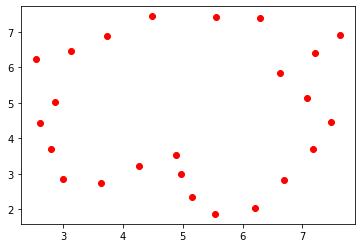

In [14]:
import random
from matplotlib import pyplot as plt 
from math import sqrt

# converting the input matrix into a 2d list
with open("TSP Matrix2.csv") as input:
    cities = [tuple([float(n) for n in line.split(",")]) for line in input.read().splitlines()]

print(cities)

# * operator can be used in conjunction with zip() to unzip the list
x, y = zip(*cities)
plt.scatter(x, y, c="r")
plt.show()

Optimal Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Optimal Path distance: 22.077328545028728


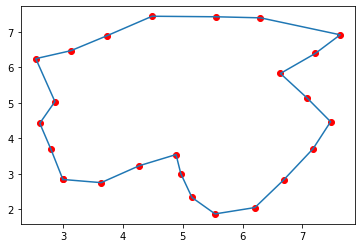

Initial Greedy Path: [16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 10, 9]
Initial Greedy Path distance: 24.502572350426668


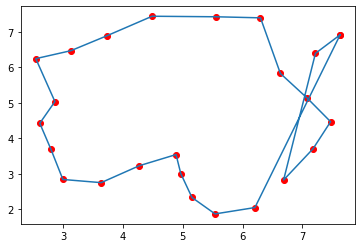

Initial Random Path: [11, 14, 4, 22, 6, 5, 20, 1, 15, 19, 18, 23, 21, 7, 17, 8, 13, 3, 10, 16, 0, 12, 2, 9]
Initial Random Path distance: 66.7219975904777


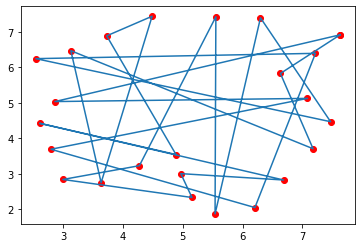

In [27]:
# function to calculate the distance between two cities
def calculate_hypotenuse(cits, a, b):
    x1, y1 = cits[a]
    x2, y2 = cits[b]
    return sqrt( abs(x1-x2)**2 + abs(y1-y2) )

# function to calculate the length of the path
def calculate_distance(cits, path):
    l = len(path)
    total = 0
    for i in range(l):
        total += calculate_hypotenuse(cits, path[i], path[(i+1)%l])
    return total

# function generating a random initial path
def create_initial_random(cits):
    indices = list(range(len(cits)))
    random.shuffle(indices)
    return indices

# function generating the initial path using greedy algorithm
# always choosing the closest unvisited node
def create_initial_greedy(cits, start):
    path = [start]
    while len(path) < len(cits):
        current = path[-1]
        indices = [ind for ind in range(len(cits)) if ind not in path]
        smallest = float("inf")
        next = -1
        for ind in indices:
            if calculate_hypotenuse(cits, current, ind) < smallest:
                smallest = calculate_hypotenuse(cits, current, ind)
                next = ind
        path.append(next)
    return path

# path drawing function
def draw_path(cits, path):
    route = [cits[path[-1]]]
    for n in path:
        route.append(cits[n])
    x, y = zip(*route)
    plt.scatter(x, y, c="r")
    plt.plot(x, y)
    plt.show()

optimal = list(range(len(cities)))
print("Optimal Path:", optimal)
print("Optimal Path distance:", calculate_distance(cities, optimal))
draw_path(cities, optimal)

initial_greedy = create_initial_greedy(cities, random.randrange(len(cities)))
print("Initial Greedy Path:", initial_greedy)
print("Initial Greedy Path distance:", calculate_distance(cities, initial_greedy))
draw_path(cities, initial_greedy)

initial_random = create_initial_random(cities)
print("Initial Random Path:", initial_random)
print("Initial Random Path distance:", calculate_distance(cities, initial_random))
draw_path(cities, initial_random)

Running steepest ascent - choosing from all right-neighbour swaps
Initial route:


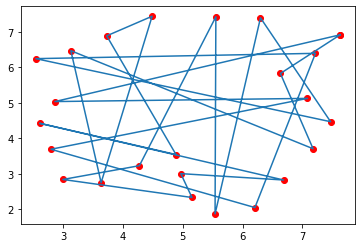

Initial distance =  66.7219975904777
Final route:


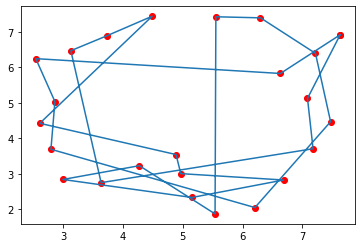

Final distance =  44.33543545761291


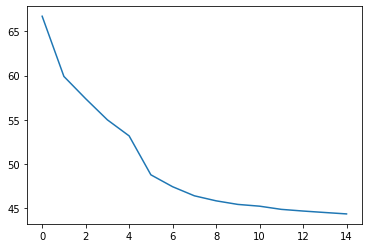

Running steepest ascent - choosing from all right-neighbour swaps
Initial route:


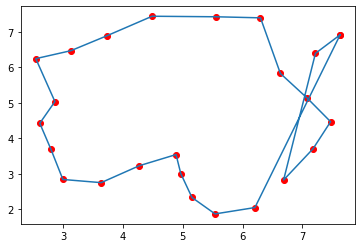

Initial distance =  24.502572350426668
Final route:


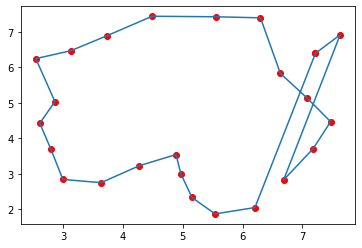

Final distance =  24.463269660419183


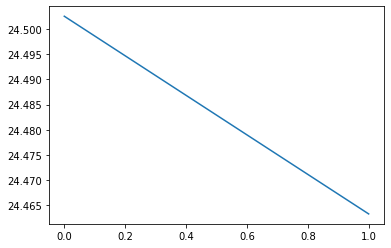

In [28]:
# function that chooses the steepest ascent amongst all right-neighbour swaps
def steepest_ascent(cits, path):
    smallest = calculate_distance(cits, path)
    temp_path = path
    for i in range(len(path)):
        p = list(path)
        temp = p[i]
        p[i] = p[(i+1)%len(p)]
        p[(i+1)%len(p)] = temp
        if calculate_distance(cits, p) < smallest:
            smallest = calculate_distance(cits, p)
            temp_path = p
    return temp_path

def run_steepest(cits, path):
    p = list(path)
    print("Running steepest ascent - choosing from all right-neighbour swaps")
    print("Initial route:")
    draw_path(cits, p)
    print("Initial distance = ", calculate_distance(cits, p))
    no_improvement_for = 0
    dists = []
    while no_improvement_for < 1:
        current_distance = calculate_distance(cits, p)
        dists.append(current_distance)
        new_p = steepest_ascent(cits, p)
        if calculate_distance(cits, new_p) < current_distance:
            p = new_p
            no_improvement_for = 0
        else:
            no_improvement_for += 1
    print("Final route:")
    draw_path(cits, p)
    print("Final distance = ", dists[-1])
    plt.plot(dists)
    plt.show()

run_steepest(cities, initial_random)
run_steepest(cities, initial_greedy)

We can see that the Steepest Ascent Hill climbing algorithm very quickly finds a local optimal solution. However, that solution is final, and it doesn't improve beyond it in future iterations. 

Running simple hillclimbing - swapping two random nodes
Initial route:


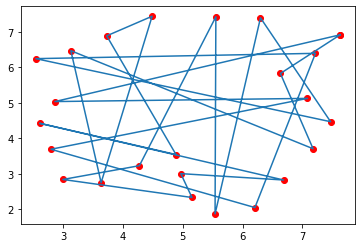

Initial distance =  66.7219975904777
Final route:


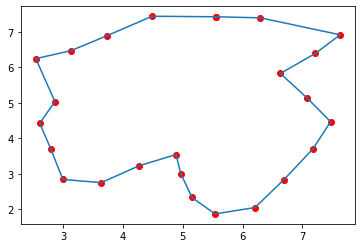

Final distance =  22.077328545028728


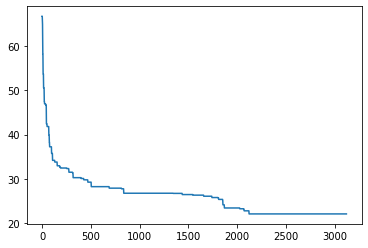

Running simple hillclimbing - swapping two random nodes
Initial route:


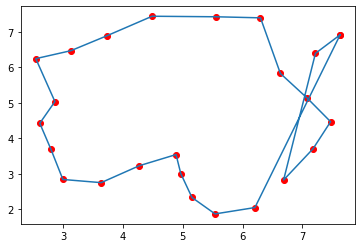

Initial distance =  24.502572350426668
Final route:


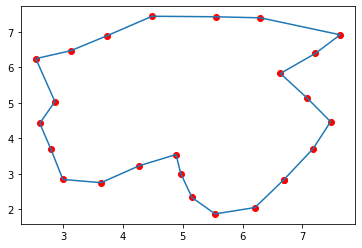

Final distance =  22.07732854502873


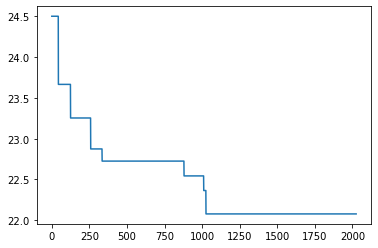

In [34]:
# function that swaps two random nodes
def hill_climbing_random(path):
    p = list(path)
    index1 = random.randrange(0, len(p))
    index2 = index1
    while index2 == index1:
        index2 = random.randrange(0, len(p))
    temp = p[index2]
    p[index2] = p[index1]
    p[index1] = temp
    return p

def run_random(cits, path):
    p = list(path)
    print("Running simple hillclimbing - swapping two random nodes")
    print("Initial route:")
    draw_path(cits, p)
    print("Initial distance = ", calculate_distance(cits, p))
    no_improvement_for = 0
    dists = []
    while no_improvement_for < 1000:
        current_distance = calculate_distance(cits, p)
        dists.append(current_distance)
        new_p = hill_climbing_random(p)
        if calculate_distance(cits, new_p) < current_distance:
            p = new_p
            no_improvement_for = 0
        else:
            no_improvement_for += 1
    print("Final route:")
    draw_path(cits, p)
    print("Final distance = ", dists[-1])
    plt.plot(dists)
    plt.show()

run_random(cities, initial_random)
run_random(cities, initial_greedy)

An algorithm that swaps two random nodes needs to run for more iterations, but doesn't get stuck as quickly, and thus achieves better solutions. Sometimes, as in the example above, the found solution is optimal (this doesn't happen every time!).

Running steepest ascent - choosing from all possible swaps
Initial route:


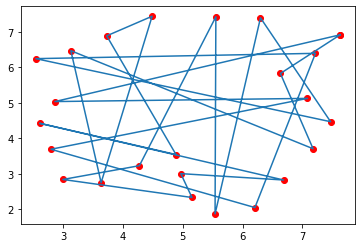

Initial distance =  66.7219975904777
Final route:


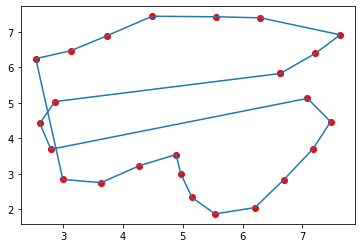

Final distance =  29.269454229280853


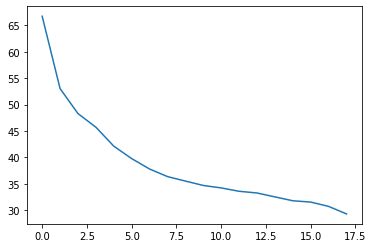

Running steepest ascent - choosing from all possible swaps
Initial route:


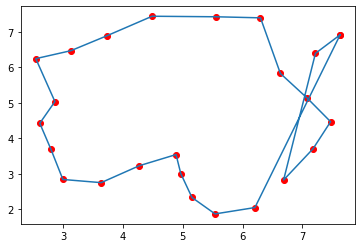

Initial distance =  24.502572350426668
Final route:


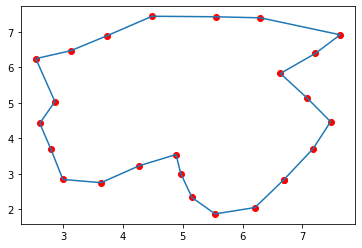

Final distance =  22.07732854502873


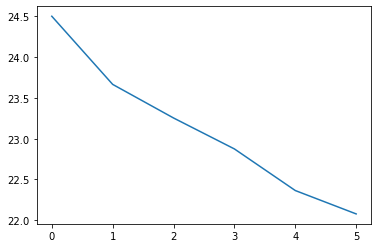

In [38]:
# function that chooses the steepest ascent amongst all possible swaps
def steepest_ascent2(cits, path):
    smallest = calculate_distance(cits, path)
    temp_path = path
    for i in range(len(path)-1):
        for j in range(i+1, len(path)):
            p = list(path)
            temp = p[i]
            p[i] = p[j]
            p[j] = temp
            if calculate_distance(cits, p) < smallest:
                smallest = calculate_distance(cits, p)
                temp_path = p
    return temp_path

def run_steepest2(cits, path):
    p = list(path)
    print("Running steepest ascent - choosing from all possible swaps")
    print("Initial route:")
    draw_path(cits, p)
    print("Initial distance = ", calculate_distance(cits, p))
    no_improvement_for = 0
    dists = []
    while no_improvement_for < 1:
        current_distance = calculate_distance(cits, p)
        dists.append(current_distance)
        new_p = steepest_ascent2(cits, p)
        if calculate_distance(cits, new_p) < current_distance:
            p = new_p
            no_improvement_for = 0
        else:
            no_improvement_for += 1
    print("Final route:")
    draw_path(cits, p)
    print("Final distance = ", dists[-1])
    plt.plot(dists)
    plt.show()

run_steepest2(cities, initial_random)
run_steepest2(cities, initial_greedy)

### A random map of 100 nodes

[(3.119, 3.699), (1.702, 2.219), (6.015, 6.442), (0.814, 1.181), (6.31, 2.992), (6.751, 2.751), (8.16, 0.752), (1.161, 8.977), (0.629, 9.37), (3.58, 6.015), (9.598, 9.862), (5.827, 3.583), (3.625, 3.633), (5.22, 9.323), (8.806, 7.941), (7.574, 3.7), (7.121, 2.989), (7.152, 3.626), (7.31, 1.094), (4.865, 5.634), (3.214, 0.733), (4.455, 9.454), (2.866, 5.298), (7.028, 3.949), (8.031, 8.438), (1.186, 1.72), (2.411, 4.78), (6.328, 8.5), (8.767, 1.062), (3.206, 5.006), (7.097, 6.975), (0.285, 8.914), (0.321, 6.574), (6.382, 6.19), (2.649, 0.505), (7.52, 4.595), (6.293, 8.77), (5.893, 9.246), (9.119, 3.514), (5.096, 4.091), (9.603, 9.872), (1.804, 9.535), (5.912, 3.318), (0.056, 7.399), (7.178, 1.926), (5.061, 9.116), (0.961, 7.874), (9.715, 8.565), (3.284, 0.405), (3.006, 0.889), (1.635, 2.461), (0.764, 9.565), (6.137, 3.166), (0.721, 1.747), (8.902, 2.081), (6.559, 4.546), (9.726, 2.331), (9.783, 2.283), (5.812, 8.311), (3.855, 8.834), (8.367, 8.874), (0.727, 3.635), (9.489, 7.933), (0.705

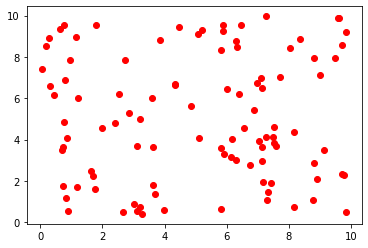

In [19]:
rand_cities = []

for i in range(100):
    a = round(random.uniform(0, 10), 3)
    b = round(random.uniform(0, 10), 3)
    rand_cities.append((a, b))
    

print(rand_cities)

# * operator can be used in conjunction with zip() to unzip the list
x, y = zip(*rand_cities)
plt.scatter(x, y, c="r")
plt.show()

Initial Greedy Path: [62, 14, 91, 82, 30, 86, 64, 33, 2, 71, 55, 76, 11, 42, 52, 4, 5, 16, 17, 15, 81, 70, 98, 23, 35, 78, 38, 83, 54, 56, 57, 94, 28, 6, 18, 89, 95, 44, 88, 90, 48, 99, 20, 49, 34, 84, 25, 53, 3, 85, 1, 50, 63, 61, 72, 74, 68, 77, 32, 66, 46, 7, 8, 51, 31, 96, 43, 41, 80, 73, 22, 29, 26, 75, 0, 12, 79, 92, 9, 93, 97, 19, 39, 58, 27, 36, 37, 69, 67, 87, 24, 60, 47, 65, 10, 40, 13, 45, 21, 59]
Initial Greedy Path distance: 95.5636013602594


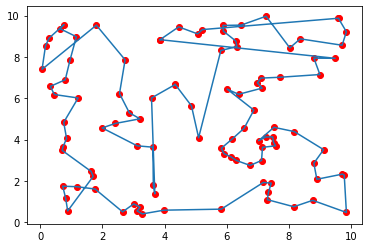

Initial Random Path: [68, 34, 43, 44, 53, 14, 81, 90, 97, 35, 11, 56, 26, 31, 39, 85, 21, 66, 18, 95, 54, 24, 51, 23, 64, 47, 0, 67, 71, 49, 36, 92, 72, 1, 45, 38, 62, 59, 15, 30, 40, 4, 25, 32, 80, 86, 2, 3, 52, 87, 84, 79, 83, 96, 82, 65, 33, 75, 5, 76, 20, 16, 17, 73, 8, 19, 55, 12, 63, 41, 48, 91, 7, 78, 74, 88, 50, 61, 27, 94, 69, 70, 77, 99, 58, 98, 29, 9, 22, 37, 10, 57, 89, 46, 13, 42, 93, 60, 6, 28]
Initial Random Path distance: 406.4133244406452


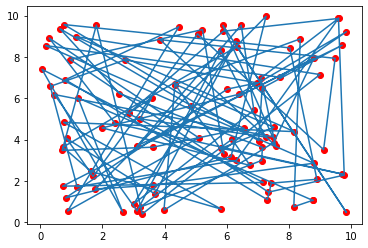

In [20]:
initial_greedy = create_initial_greedy(rand_cities, random.randrange(len(rand_cities)))
print("Initial Greedy Path:", initial_greedy)
print("Initial Greedy Path distance:", calculate_distance(rand_cities, initial_greedy))
draw_path(rand_cities, initial_greedy)

initial_random = create_initial_random(rand_cities)
print("Initial Random Path:", initial_random)
print("Initial Random Path distance:", calculate_distance(rand_cities, initial_random))
draw_path(rand_cities, initial_random)

Running steepest ascent - choosing from all right-neighbour swaps
Initial route:


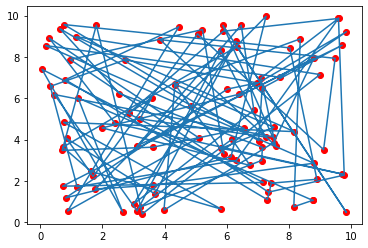

Initial distance =  406.4133244406452
Final route:


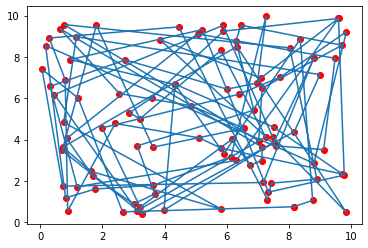

Final distance =  309.8438098302281


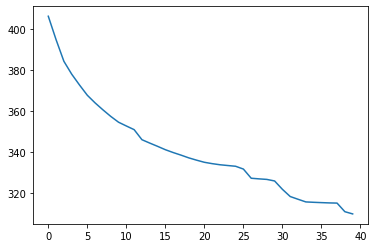

In [21]:
run_steepest(rand_cities, initial_random)

Running steepest ascent - choosing from all right-neighbour swaps
Initial route:


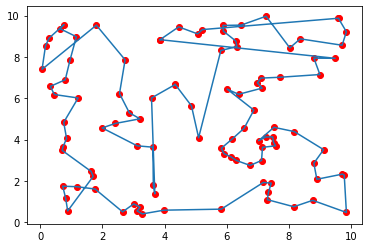

Initial distance =  95.5636013602594
Final route:


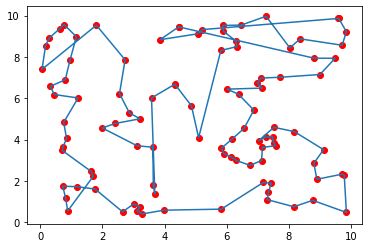

Final distance =  94.69348631534952


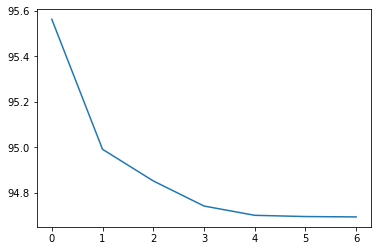

In [22]:
run_steepest(rand_cities, initial_greedy)

Running simple hillclimbing - swapping two random nodes
Initial route:


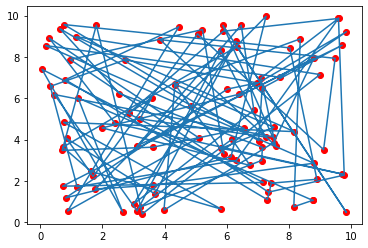

Initial distance =  406.4133244406452
Final route:


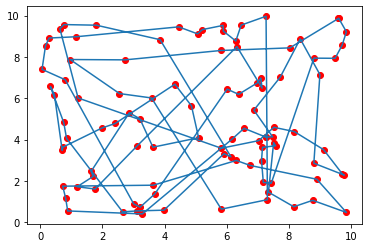

Final distance =  140.08207771810032


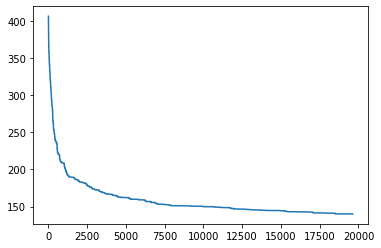

In [23]:
run_random(rand_cities, initial_random)

Running simple hillclimbing - swapping two random nodes
Initial route:


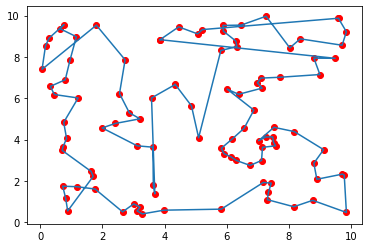

Initial distance =  95.5636013602594
Final route:


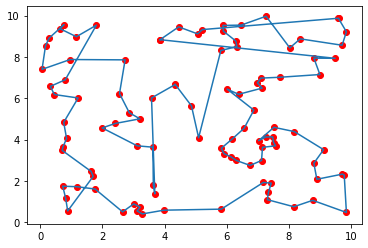

Final distance =  95.42711117244998


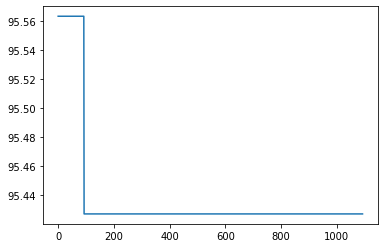

In [24]:
run_random(rand_cities, initial_greedy)

Running steepest ascent - choosing from all possible swaps
Initial route:


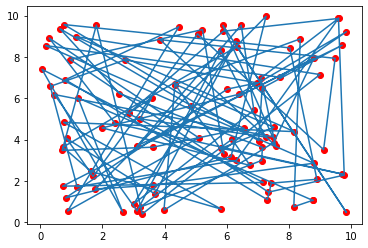

Initial distance =  406.4133244406452
Final route:


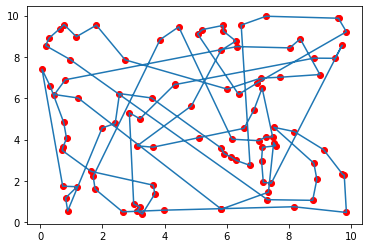

Final distance =  139.45614056987966


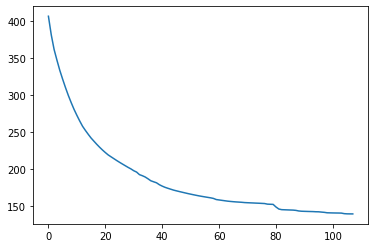

In [25]:
run_steepest2(rand_cities, initial_random)

Running steepest ascent - choosing from all possible swaps
Initial route:


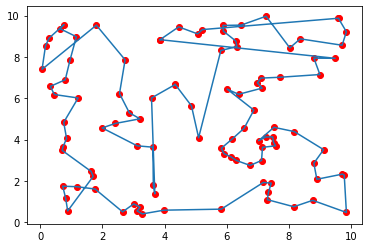

Initial distance =  95.5636013602594
Final route:


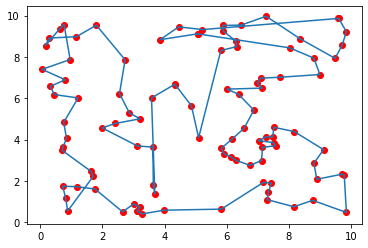

Final distance =  93.18086664058917


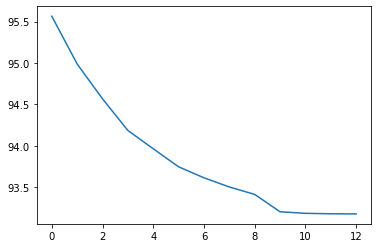

In [26]:
run_steepest2(rand_cities, initial_greedy)